### Web Recommender Systems 2024: Final Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from constants import (PLOTS_PATH, DATA_PATH)


# save data samples and plots in a separate directory
if not os.path.exists(DATA_PATH): 
    os.makedirs(DATA_PATH) 
    
if not os.path.exists(PLOTS_PATH): 
    os.makedirs(PLOTS_PATH) 

##### Load and clean data

In [3]:
def clean_split(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans dataframe from missing IDs and duplicates.
    Params:
        df(pd.DataFrame): input dataframe to be preprocessed.
    Returns: 
        Cleaned data split from missing information and duplicates.
    """
    df_cleaned = df.dropna().drop_duplicates()
    return df_cleaned


# import the dataset splits
orig_train_df = pd.read_csv(f'{DATA_PATH}train.tsv', sep='\t')
orig_test_df = pd.read_csv(f'{DATA_PATH}test.tsv', sep='\t')

# clean data
train_df = clean_split(orig_train_df)
test_df = clean_split(orig_test_df)

# remove users that do not appear in the training set
user_difference = set(test_df['user_id'].values).difference(set(train_df['user_id'].values))
test_df.drop(test_df[test_df['user_id'].isin(user_difference)].index, inplace=True)

# transform unary rating to binary rating
train_df['rating'] = 1
test_df['rating'] = 1
# save train and test set with rating column to file
train_df.to_csv(f'{DATA_PATH}train_df_with_rating.csv', index=False)
test_df.to_csv(f'{DATA_PATH}test_df_with_rating.csv', index=False)

##### Data exploration

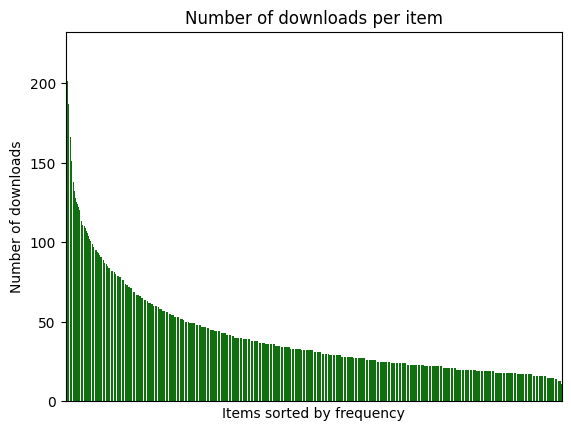

In [4]:
# item statistics
item_count = train_df['item_id'].value_counts().sort_values(ascending = False)
items_ax = sns.barplot(x=item_count.index, y=item_count.values, order=item_count.index, color="g")
items_ax.set(
    title='Number of downloads per item',
    xlabel='Items sorted by frequency',
    ylabel='Number of downloads',
    xticks=[]
)

plt.savefig(f'{PLOTS_PATH}downloads_per_item.png')


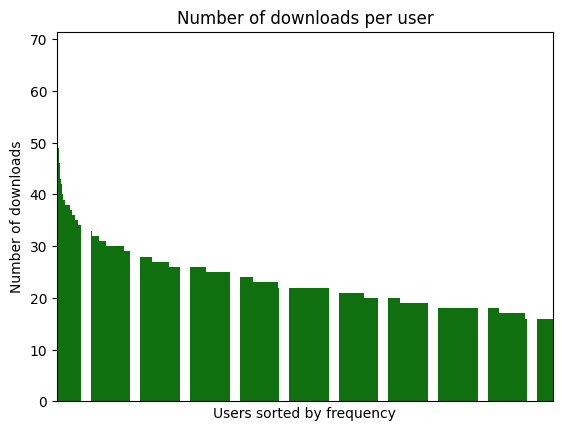

In [5]:
user_count = train_df['user_id'].value_counts().sort_values(ascending = False)
users_ax = sns.barplot(x=user_count.index, y=user_count.values, order=user_count.index, color="g")
users_ax.set(
    title='Number of downloads per user',
    xlabel='Users sorted by frequency',
    ylabel='Number of downloads',
    xticks=[]
)

plt.savefig(f'{PLOTS_PATH}downloads_per_user.png');


In [25]:
print('The top 5 most downloaded songs:')
item_count[:5]

The top 5 most downloaded songs:


2076    221
1671    219
1854    213
2208    211
7486    210
Name: item_id, dtype: int64

In [26]:
user_count.describe()

count    2966.000000
mean       23.245786
std         5.820236
min        16.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        68.000000
Name: user_id, dtype: float64

In [27]:
item_count.describe()

count    1669.000000
mean       41.310365
std        29.751058
min        11.000000
25%        22.000000
50%        31.000000
75%        49.000000
max       221.000000
Name: item_id, dtype: float64

In [30]:
print('Sparsity:', (1 - train_df.shape[0]/(user_count.shape[0] * item_count.shape[0])) * 100)

Sparsity: 98.60720278191786
